# What proportion of Wikipedia English articles have 200 words or less? 


In [22]:
import requests
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
url = "https://en.wikipedia.org/w/api.php"

In [37]:
has200 = 0
count = 0
sample_size = 100
session = requests.Session()
total_articles_sampled = 0
headers = {
    'User-Agent': 'StatisticsEducationBot/1.0 (Statistics Class Project; educational use)'
}
proportions = []
pair_count = 0  
short_in_pair = 0

In [38]:
while count < sample_size :
    print(count)
    for i in range(10):
        params = {
        "action": "query",
        "list": "random",
        "rnnamespace": 0,
        "format": "json"
        }
        url = "https://en.wikipedia.org/w/api.php"
        response = session.get(url=url, params=params, headers=headers)
        data = response.json()
        article_title = data['query']['random'][0]['title']
        
        content_params = {
        "action": "query",
        "titles": article_title,
        "prop": "extracts", 
        "explaintext": True, 
        "format": "json"
        }
        response = session.get(url=url, params=content_params, headers=headers)
        data = response.json()
        
        pages = data['query']['pages']
        page_id = list(pages.keys())[0]
        content = pages[page_id].get('extract', '')
        word_count = len(content.split())
        
        if word_count == 0 :
            continue
        elif word_count <= 200:
            has200 += 1
            short_in_pair += 1
        pair_count += 1  
        total_articles_sampled += 1
        if pair_count == 10:
            pair_proportions = short_in_pair / 10   
            proportions.append(pair_proportions)  
            pair_count = 0
            short_in_pair = 0
    count += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [39]:
print(proportions)

[0.5, 0.5, 0.7, 0.4, 0.3, 0.6, 0.2, 0.3, 0.2, 0.4, 0.1, 0.4, 0.3, 0.4, 0.3, 0.5, 0.4, 0.6, 0.8, 0.4, 0.5, 0.5, 0.5, 0.2, 0.3, 0.8, 0.5, 0.3, 0.3, 0.7, 0.6, 0.4, 0.5, 0.8, 0.7, 0.2, 0.3, 0.6, 0.1, 0.6, 0.6, 0.3, 0.5, 0.5, 0.4, 0.6, 0.3, 0.6, 0.5, 0.4, 0.8, 0.5, 0.4, 0.6, 0.4, 0.6, 0.5, 0.7, 0.5, 0.6, 0.5, 0.7, 0.5, 0.4, 0.5, 0.6, 0.4, 0.7, 0.3, 0.5, 0.5, 0.8, 0.3, 0.6, 0.4, 0.4, 0.7, 0.5, 0.2, 0.6, 0.8, 0.4, 0.6, 0.3, 0.4, 0.2, 0.7, 0.5, 0.2, 0.3, 0.6, 0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 0.3, 0.6, 0.5]


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Estimated proportion of Wikipedia articles ≤ 200 words')

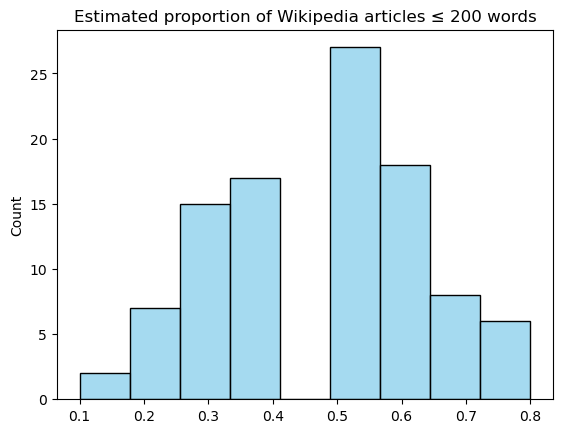

In [40]:
sns.histplot(x=proportions,color="skyblue")
plt.title("Estimated proportion of Wikipedia articles ≤ 200 words")

100

In [41]:
overall_proportions = has200 / total_articles_sampled
n = total_articles_sampled
p = overall_proportions
SE = (p * (1 - p) / n) ** 0.5
print("Standard Error:", SE)
MOE = 1.96 * SE
print("margin of error:",MOE)
print("Proportion", overall_proportions)

Standard Error: 0.01579316307773715
margin of error: 0.030954599632364813
Proportion 0.476


Answer: based on my simulation, the proportion of Wikipedia English articles that have 200 words or less is 47.6%, and the Standard Error is 0.0158 and the margin of error that is less than 10% is 3.10%.